In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

2022-10-17 21:20:38.892677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 21:20:39.001382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 21:20:39.001395: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-17 21:20:39.019271: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 21:20:39.413443: W tensorflow/stream_executor/platform/de

In [3]:
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),kernel_initializer='orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     2560      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 256)    1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 activation_1 (Activation)   (None, 109, 109, 128)     0

2022-10-17 21:20:41.615165: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-10-17 21:20:41.615268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DMNS
2022-10-17 21:20:41.615288: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DMNS
2022-10-17 21:20:41.615523: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.76.0
2022-10-17 21:20:41.615598: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-17 21:20:41.615617: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 515.76.0 -- cannot find working devices in this configuration
2022-10-17 21:20:41.616392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary 

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
#from keras.callbacks import ModelCheckpoint

#checkpoint = ModelCheckpoint('models/model={epoch:03d}.h5',monitor='val_loss', save_best_only=True,mode='auto')

In [6]:

#history= model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10,callbacks=[checkpoint])
history= model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10)

Epoch 1/10


2022-10-17 21:20:56.571679: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1614938112 exceeds 10% of free system memory.
2022-10-17 21:20:56.890187: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1614938112 exceeds 10% of free system memory.
2022-10-17 21:20:59.931369: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1614938112 exceeds 10% of free system memory.
2022-10-17 21:21:00.649565: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1614938112 exceeds 10% of free system memory.


 1/21 [>.............................] - ETA: 1:51 - loss: 0.6862 - accuracy: 0.6250

2022-10-17 21:21:01.758976: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1614938112 exceeds 10% of free system memory.


21/21 [==============================] - 115s 5s/step - loss: 1.6383 - accuracy: 0.6877 - val_loss: 0.6936 - val_accuracy: 0.2533
Epoch 2/10
21/21 [==============================] - 120s 6s/step - loss: 0.3405 - accuracy: 0.8198 - val_loss: 0.6938 - val_accuracy: 0.2533
Epoch 3/10
21/21 [==============================] - 118s 6s/step - loss: 0.1638 - accuracy: 0.9414 - val_loss: 0.6840 - val_accuracy: 0.8267
Epoch 4/10
21/21 [==============================] - 119s 6s/step - loss: 0.1370 - accuracy: 0.9489 - val_loss: 0.6934 - val_accuracy: 0.3467
Epoch 5/10
21/21 [==============================] - 120s 6s/step - loss: 0.0554 - accuracy: 0.9805 - val_loss: 0.6810 - val_accuracy: 0.8267
Epoch 6/10
21/21 [==============================] - 119s 6s/step - loss: 0.0175 - accuracy: 0.9970 - val_loss: 0.6520 - val_accuracy: 0.9200
Epoch 7/10
21/21 [==============================] - 118s 6s/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.6119 - val_accuracy: 0.9333
Epoch 8/10
21/21 [======

In [12]:
import os
import tensorflow as tf
from tensorflow import keras
tf.keras.models.save_model(model,'Model.h5')

In [13]:
model.save('model1.h5')

In [15]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('FashionMNIST_weights.h5')
#Model loss and accuracy
#loss,acc = model.evaluate(test_images,  test_labels, verbose=2)

In [16]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('fashionmnist_model.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_j = tf.keras.models.model_from_json(json_savedModel)
model_j.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     2560      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 256)    1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 activation_1 (Activation)   (None, 109, 109, 128)     0

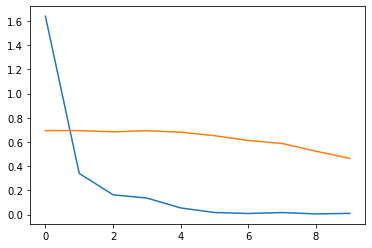

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

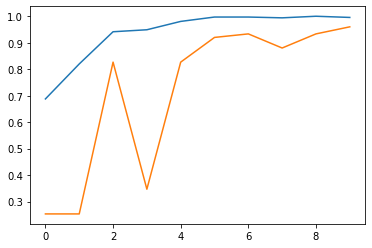

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [7]:
model.save('CNNM.h5')